Task 1:

This assignment is for visualization using matplotlib:
data to use:
url= https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv
titanic = pd.read_csv(url)

In [19]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [14]:
titanic=pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv')

In [15]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


Charts to plot:

In [16]:
titanic.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

1. Create a pie chart presenting the male/female proportion

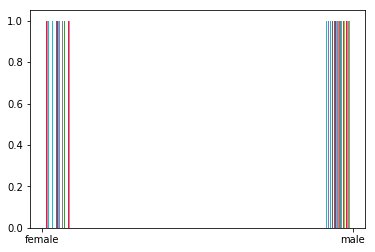

In [17]:
plt.hist(titanic.sex)
plt.show()


2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

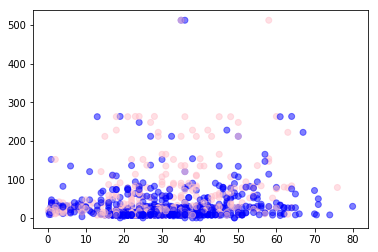

In [123]:
df=titanic.dropna(subset=['sex'])
mapp={'male':'blue','female':'pink'}
plt.scatter(df['age'],df['fare'],alpha=0.5,c=df['sex'].map(mapp))

Task 2:

It happens all the time: someone gives you data containing malformed strings, Python, lists and
missing data. How do you tidy it up so you can get on with the analysis?
Take this monstrosity as the DataFrame to use in the following puzzles:
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm',
'Budapest_PaRis', 'Brussels_londOn'],
'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', '12. Air France', '"Swiss Air"']})

In [20]:
df2 = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm',
'Budapest_PaRis', 'Brussels_londOn'],
'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],

'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', '12. Air France', '"Swiss Air"']})

1. Some values in the the FlightNumber column are missing. These numbers are meant to
increase by 10 with each row so 10055 and 10075 need to be put in place. Fill in these missing
numbers and make the column an integer column (instead of a float column).

In [66]:
for i in range(len(df2)):
    #print(dt)
    if pd.isnull(df2.iloc[i]['FlightNumber']):
        df2.at[i,'FlightNumber']= int(df2.iloc[i-1]['FlightNumber'])+10

In [67]:
df2

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045.0,"[23, 47]",KLM(!)
1,MAdrid_miLAN,10055.0,[],<Air France> (12)
2,londON_StockhOlm,10065.0,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,10075.0,[13],12. Air France
4,Brussels_londOn,10085.0,"[67, 32]","""Swiss Air"""


In [75]:
df2['FlightNumber'].astype(np.int64,inplace=True)

0    10045
1    10055
2    10065
3    10075
4    10085
Name: FlightNumber, dtype: int64

2. The From_To column would be better as two separate columns! Split each string on the
underscore delimiter _ to give a new temporary DataFrame with the correct values. Assign the
correct column names to this temporary DataFrame.

In [98]:
dftempcities=pd.DataFrame()
lstFrom=list()
lstTo=list()
for i in df2['From_To']:
    cts=i.split('_')
    lstFrom.append(cts[0])
    lstTo.append(cts[1])
dftempcities['From']=lstFrom
dftempcities['To']=lstTo

3. Notice how the capitalisation of the city names is all mixed up in this temporary DataFrame.
Standardise the strings so that only the first letter is uppercase (e.g. "londON" should become
"London".)

In [99]:
dftempcities

,From,To
0,LoNDon,paris
1,MAdrid,miLAN
2,londON,StockhOlm
3,Budapest,PaRis
4,Brussels,londOn


In [100]:
dftempcities['From']=dftempcities['From'].str.capitalize()
dftempcities['To']=dftempcities['To'].str.capitalize()

In [101]:
dftempcities

,From,To
0,London,Paris
1,Madrid,Milan
2,London,Stockholm
3,Budapest,Paris
4,Brussels,London


4. Delete the From_To column from df and attach the temporary DataFrame from the previous
questions.

In [102]:
df2.drop('From_To',axis=1,inplace=True)

In [103]:
df2

,FlightNumber,RecentDelays,Airline
0,10045.0,"[23, 47]",KLM(!)
1,10055.0,[],<Air France> (12)
2,10065.0,"[24, 43, 87]",(British Airways. )
3,10075.0,[13],12. Air France
4,10085.0,"[67, 32]","""Swiss Air"""


In [104]:
df2=pd.concat([dftempcities,df2],axis=1)

5. In the RecentDelays column, the values have been entered into the DataFrame as a list. We
would like each first value in its own column, each second value in its own column, and so on. If
there isn't an Nth value, the value should be NaN.

In [105]:
df2

,From,To,FlightNumber,RecentDelays,Airline
0,London,Paris,10045.0,"[23, 47]",KLM(!)
1,Madrid,Milan,10055.0,[],<Air France> (12)
2,London,Stockholm,10065.0,"[24, 43, 87]",(British Airways. )
3,Budapest,Paris,10075.0,[13],12. Air France
4,Brussels,London,10085.0,"[67, 32]","""Swiss Air"""


In [120]:
lst0=list()
lst1=list()
lst2=list()
lst3=list()
lst4=list()
delays=pd.DataFrame()
for ds in df2['RecentDelays']:
        try:
            lst0.append(ds[0])
        except:
            lst0.append(np.NaN)
        try:
            lst1.append(ds[1])
        except:
            lst1.append(np.NaN)
        try:
            lst2.append(ds[2])
        except:
            lst2.append(np.NaN)
        try:
            lst3.append(ds[3])
        except:
            lst3.append(np.NaN)
        try:
            lst4.append(ds[4])
        except:
            lst4.append(np.NaN)

delays['delay_1']=lst0
delays['delay_2']=lst1
delays['delay_3']=lst2
delays['delay_4']=lst3
delays['delay_5']=lst4
delays

,delay_1,delay_2,delay_3,delay_4,delay_5
0,23.0,47.0,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,24.0,43.0,87.0,NaN,NaN
3,13.0,NaN,NaN,NaN,NaN
4,67.0,32.0,NaN,NaN,NaN


In [121]:
df2.drop('RecentDelays',axis=1,inplace=True)

In [122]:
pd.concat([df2,delays],axis=1)

,From,To,FlightNumber,Airline,delay_1,delay_2,delay_3,delay_4,delay_5
0,London,Paris,10045.0,KLM(!),23.0,47.0,NaN,NaN,NaN
1,Madrid,Milan,10055.0,<Air France> (12),NaN,NaN,NaN,NaN,NaN
2,London,Stockholm,10065.0,(British Airways. ),24.0,43.0,87.0,NaN,NaN
3,Budapest,Paris,10075.0,12. Air France,13.0,NaN,NaN,NaN,NaN
4,Brussels,London,10085.0,"""Swiss Air""",67.0,32.0,NaN,NaN,NaN
